In [128]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Load the data set
file_path = "smoke_detection_iot[1].csv"
df = pd.read_csv(file_path)

In [131]:
# Display basic info
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB
None


In [133]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64


In [136]:
# Check for duplicate rows and remove them
df.drop_duplicates(inplace=True)

In [138]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Unnamed: 0           UTC  Temperature[C]   Humidity[%]     TVOC[ppb]  \
count  62630.000000  6.263000e+04    62630.000000  62630.000000  62630.000000   
mean   31314.500000  1.654792e+09       15.970424     48.539499   1942.057528   
std    18079.868017  1.100025e+05       14.359576      8.865367   7811.589055   
min        0.000000  1.654712e+09      -22.010000     10.740000      0.000000   
25%    15657.250000  1.654743e+09       10.994250     47.530000    130.000000   
50%    31314.500000  1.654762e+09       20.130000     50.150000    981.000000   
75%    46971.750000  1.654778e+09       25.409500     53.240000   1189.000000   
max    62629.000000  1.655130e+09       59.930000     75.200000  60000.000000   

          eCO2[ppm]        Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0  \
count  62630.000000  62630.000000  62630.000000   62630.000000  62630.000000   
mean     670.021044  12942.453936  19754.257912     938.627649    100.594309   
std     1

In [139]:
# Display the first few rows of the cleaned data set
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [142]:
# Display the row and column count of the cleaned data set
df.shape

(62630, 16)

In [143]:
# Drop unnecessary columns
df.drop(columns=['Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT'], inplace=True)

In [146]:
# Rename columns for clarity
df.rename(columns={
    'UTC': 'Timestamp',
    'Temperature[C]': 'Temperature',
    'Humidity[%]': 'Humidity',
    'TVOC[ppb]': 'TVOC',
    'eCO2[ppm]': 'CO2',
    'Pressure[hPa]': 'Pressure',
    'Fire Alarm': 'Fire_Alarm'
}, inplace=True)

In [147]:
# Convert Timestamp to date-time format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [149]:
# Display cleaned column names
df.head()

,Unnamed: 0,Timestamp,Temperature,Humidity,TVOC,CO2,Pressure,Fire_Alarm
0,0,1970-01-01 00:00:01.654733331,20.000,57.36,0,400,939.735,0
1,1,1970-01-01 00:00:01.654733332,20.015,56.67,0,400,939.744,0
2,2,1970-01-01 00:00:01.654733333,20.029,55.96,0,400,939.738,0
3,3,1970-01-01 00:00:01.654733334,20.044,55.28,0,400,939.736,0
4,4,1970-01-01 00:00:01.654733335,20.059,54.69,0,400,939.744,0


<Figure size 1200x600 with 0 Axes>

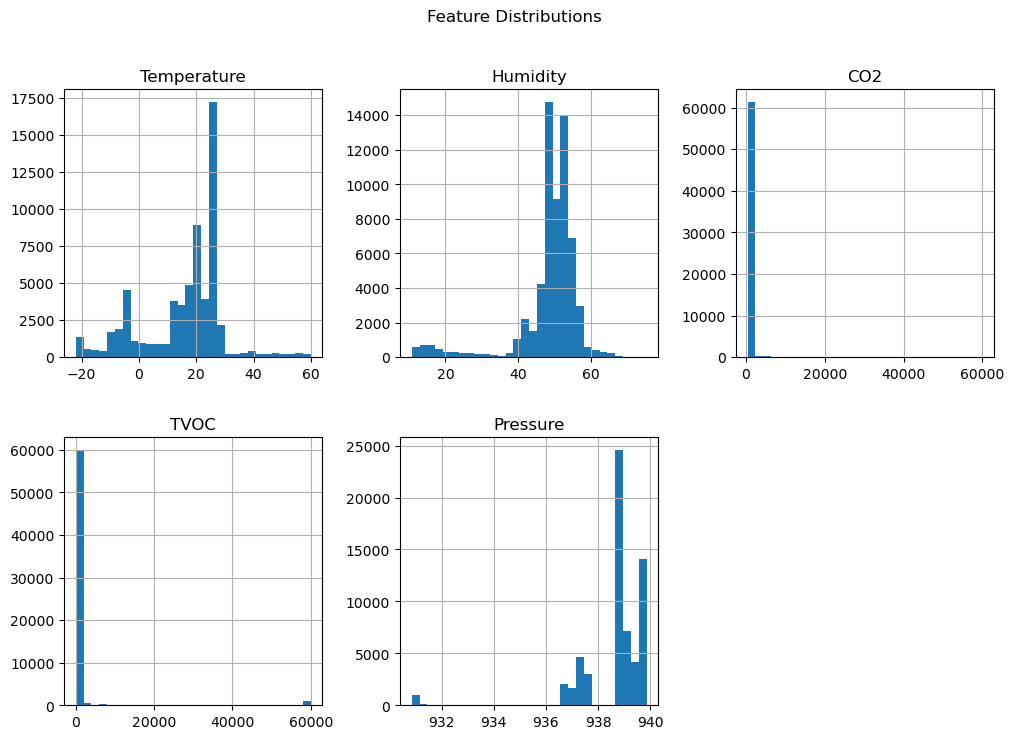

In [152]:
# Histogram: Distribution of Key Features
plt.figure(figsize=(12, 6))
df[['Temperature', 'Humidity', 'CO2', 'TVOC', 'Pressure']].hist(bins=30, figsize=(12, 8), layout=(2,3))
plt.suptitle("Feature Distributions")
plt.show()

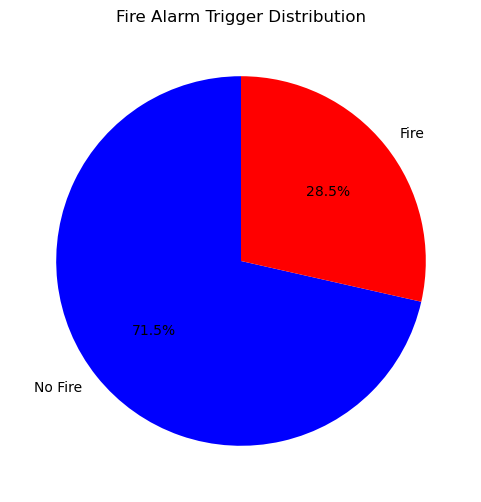

In [153]:
# Pie Chart: Fire Alarm Activation Distribution
plt.figure(figsize=(6,6))
df['Fire_Alarm'].value_counts().plot.pie(autopct='%1.1f%%', labels=["No Fire", "Fire"], colors=["blue", "red"], startangle=90)
plt.title("Fire Alarm Trigger Distribution")
plt.ylabel('')
plt.show()

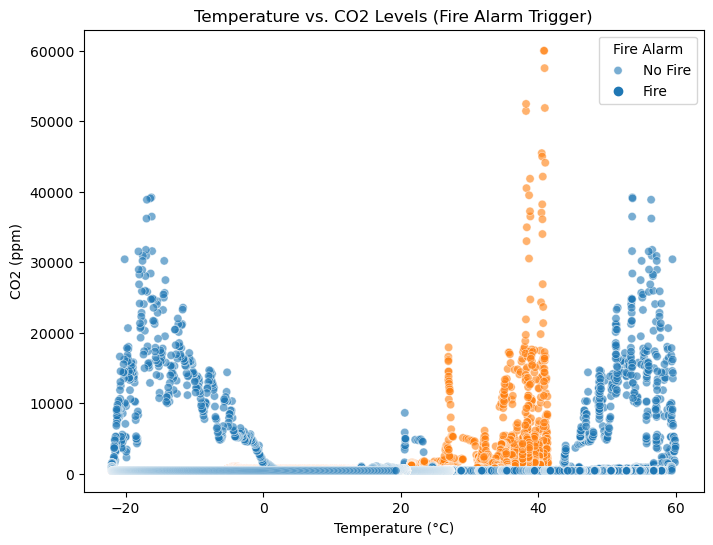

In [154]:
# Scatter plot: Temperature vs. CO2 Levels (colored by Fire Alarm status)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Temperature"], y=df["CO2"], hue=df["Fire_Alarm"], alpha=0.6)
plt.title("Temperature vs. CO2 Levels (Fire Alarm Trigger)")
plt.xlabel("Temperature (°C)")
plt.ylabel("CO2 (ppm)")
plt.legend(title="Fire Alarm", labels=["No Fire", "Fire"])
plt.show()

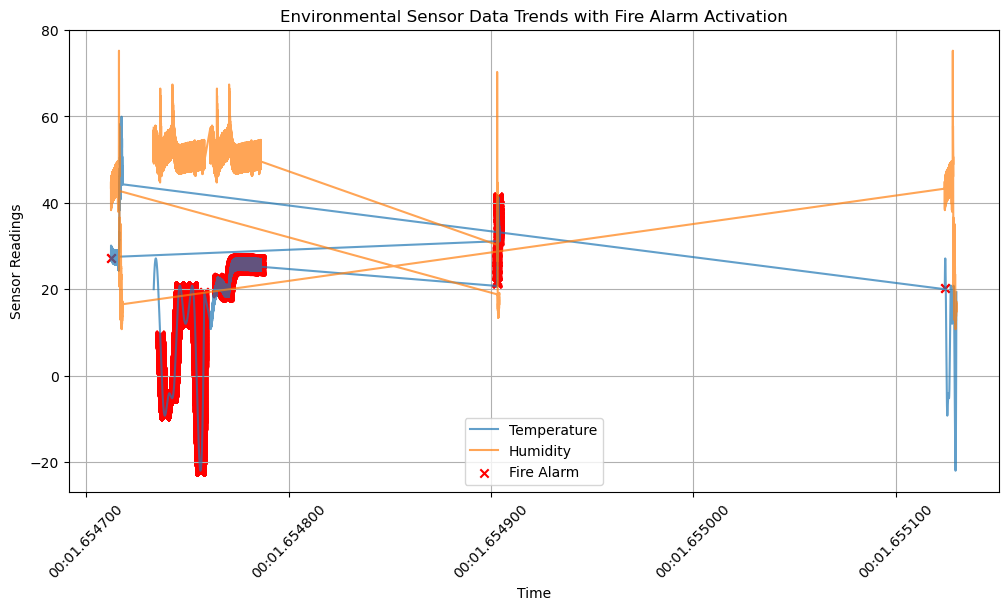

In [155]:
# Select key environmental factors for visualization
variables = ['Temperature', 'Humidity']
df_subset = df[['Timestamp', 'Fire_Alarm'] + variables]

# Plot the selected variables over time
plt.figure(figsize=(12, 6))
for var in variables:
    plt.plot(df_subset['Timestamp'], df_subset[var], label=var, alpha=0.7)

# Overlay fire alarm activation points
plt.scatter(df_subset['Timestamp'][df_subset['Fire_Alarm'] == 1], 
            df_subset['Temperature'][df_subset['Fire_Alarm'] == 1], 
            color='red', label="Fire Alarm", marker='x')

plt.xlabel("Time")
plt.ylabel("Sensor Readings")
plt.title("Environmental Sensor Data Trends with Fire Alarm Activation")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()